<a href="https://colab.research.google.com/github/AnirudhJM24/myML/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
data

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [14]:
input = data.drop('Survived',axis = 'columns')
target = data.Survived


In [16]:

input.Sex = input.Sex.map({'male': 1, 'female': 2})

In [19]:
input.Age = input.Age.fillna(input.Age.mean())

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
atrain,atest,btrain,btest = train_test_split(input,target)

In [22]:
from sklearn.tree import DecisionTreeClassifier
t = DecisionTreeClassifier()

In [23]:
t.fit(atrain,btrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
z =t.predict(atest)

In [25]:
from sklearn.metrics import confusion_matrix

In [27]:
cm = confusion_matrix(btest,z)
cm

array([[103,  27],
       [ 23,  70]])

Text(114.0, 0.5, 'Truth')

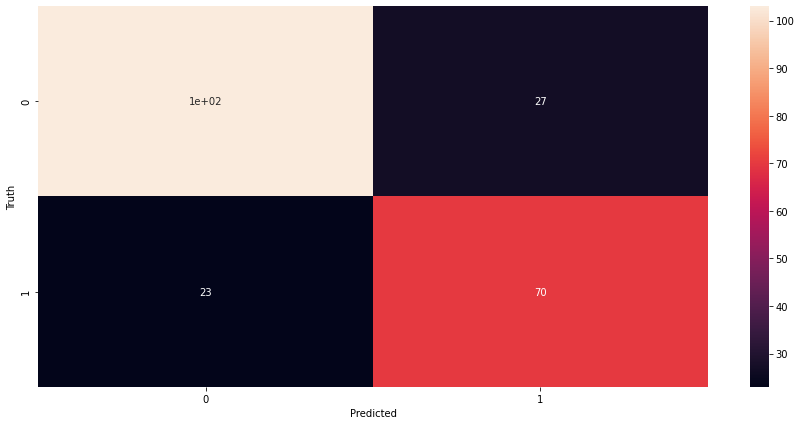

In [30]:
import seaborn as sn
plt.figure(figsize = (15,7))
sn.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier(n_estimators=40)

In [47]:
r.fit(atrain,btrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
rz = r.predict(atest)

In [49]:
cmrz = confusion_matrix(btest,rz)
cmrz

array([[111,  19],
       [ 22,  71]])

Text(69.0, 0.5, 'truth')

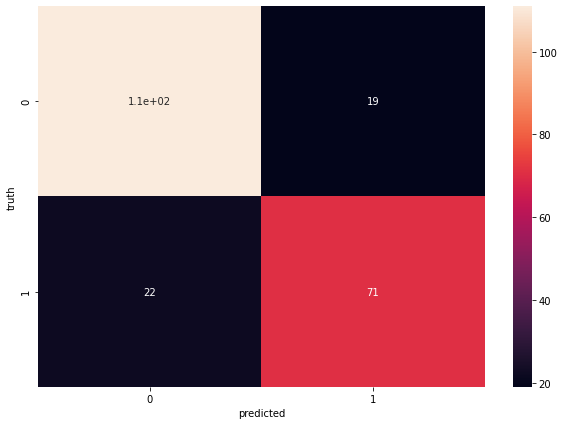

In [50]:
plt.figure(figsize = (10,7))
sn.heatmap(cmrz,annot = True)
plt.xlabel('predicted')
plt.ylabel('truth')